# **EDA Exoplanetas y Vida extraterreste**


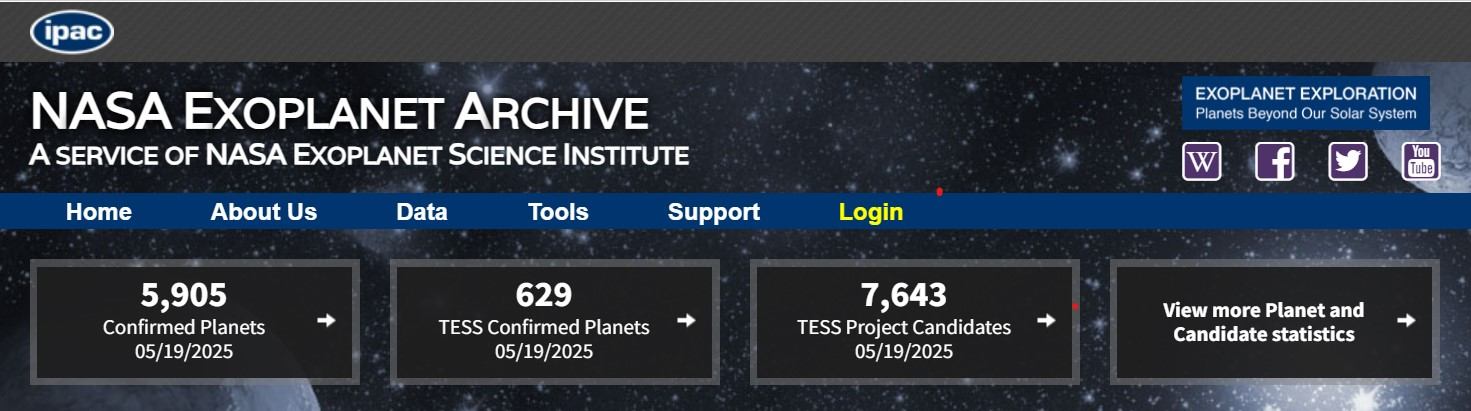

## ¿ Es posible demostrar con los datos de los que se dispone sobre exoplanetas confirmados las siguientes hipótesis?


🔬 **Hipótesis 1:**  
"Los exoplanetas ubicados dentro de la zona habitable de su estrella tienen mayor probabilidad de albergar condiciones aptas para la vida."  

*Análisis posible:*   
*Clasificar planetas en “dentro” y “fuera” de la zona habitable.*  
*Comparar sus propiedades (e.g., tipo, tamaño, masa) para evaluar la potencial habitabilidad.*   

🌍  **Hipótesis 2:**   
"Los exoplanetas rocosos con masas similares a la de la Tierra son los principales candidatos para albergar vida."  

*Análisis posible:*  
*Filtrar planetas con características similares a la Tierra.*  
*Cruzar con si están o no en la zona habitable.*  

☀️ **Hipótesis 3:**   
"Las estrellas de tipo espectral G (como el Sol) y K (enanas naranjas) y M (enanas rojas) son más propensas a tener planetas con condiciones aptas para la vida debido a su estabilidad y longevidad."  

*Análisis posible:* 
*Filtrar estrellas tipo G y K y M *  
*Ver qué porcentaje de ellas tiene planetas en zona habitable y/o rocosos.*  


🌎 **Hipótesis 4:**   
"Los exoplanetas con órbitas casi circulares tienen mayores probabilidades de tener climas estables, lo cual favorece el desarrollo de vida."  

*Análisis posible:*  
*Clasificar exoplanetas en función de su excentricidad (e.g., < 0.2 = casi circular).*  
*Cruzar con masa, ubicación en zona habitable, tipo de estrella.*  

🪐 **Hipótesis 5:**   
"Los sistemas planetarios con múltiples planetas aumentan las probabilidades de que al menos uno de ellos se ubique en la zona habitable."   

*Análisis posible:*  
*Contar cuántos planetas tiene cada sistema.*  
*Ver si los sistemas con más planetas tienen al menos uno en zona habitable.*  


🌫 **Hipótesis 6:**   
"Los exoplanetas con atmósferas densas y estables podrían conservar agua líquida, lo cual favorece la posibilidad de vida."  

*Análisis posible:*  
*Filtrar planetas de tamaño medio (1–2 R⊕) con temperaturas compatibles con agua líquida (273–373 K). *  
*Identificar si alguno tiene datos atmosféricos disponibles. (esto va a ser lo más dificil porque la nasa no tiene datos, igual los telescopios JWST o Hubble, pero tengo que mirar).*



Para ello se cuenta con los siguientes csv sacados de la página de la NASA y de KAGGEL  
[ ENLACE DE LA NASA ](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS)  
[ENLACE DE KAGGEL](https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [10]:
# Leo el csv de la Nasa
data = pd.read_csv('../Datasets/nasa.csv', skiprows=96)
data


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38444,ups And d,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
38445,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10
38446,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-07-23,2011-08,2014-07-23
38447,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-05-14,2008-06,2014-05-14


In [11]:
data.head(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
5,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
6,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
7,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2023-09-19,2023-08,2023-09-19
8,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-07-23,2011-08,2014-07-23
9,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-09-04,2017-03,2018-09-06


In [12]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38449 entries, 0 to 38448
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38449 non-null  object 
 1   hostname         38449 non-null  object 
 2   default_flag     38449 non-null  int64  
 3   sy_snum          38449 non-null  int64  
 4   sy_pnum          38449 non-null  int64  
 5   discoverymethod  38449 non-null  object 
 6   disc_year        38449 non-null  int64  
 7   disc_facility    38449 non-null  object 
 8   soltype          38449 non-null  object 
 9   pl_controv_flag  38449 non-null  int64  
 10  pl_refname       38449 non-null  object 
 11  pl_orbper        35246 non-null  float64
 12  pl_orbpererr1    33701 non-null  float64
 13  pl_orbpererr2    33700 non-null  float64
 14  pl_orbperlim     35246 non-null  float64
 15  pl_orbsmax       21646 non-null  float64
 16  pl_orbsmaxerr1   7182 non-null   float64
 17  pl_orbsmaxer

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38444,ups And d,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
38445,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10
38446,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-07-23,2011-08,2014-07-23
38447,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-05-14,2008-06,2014-05-14


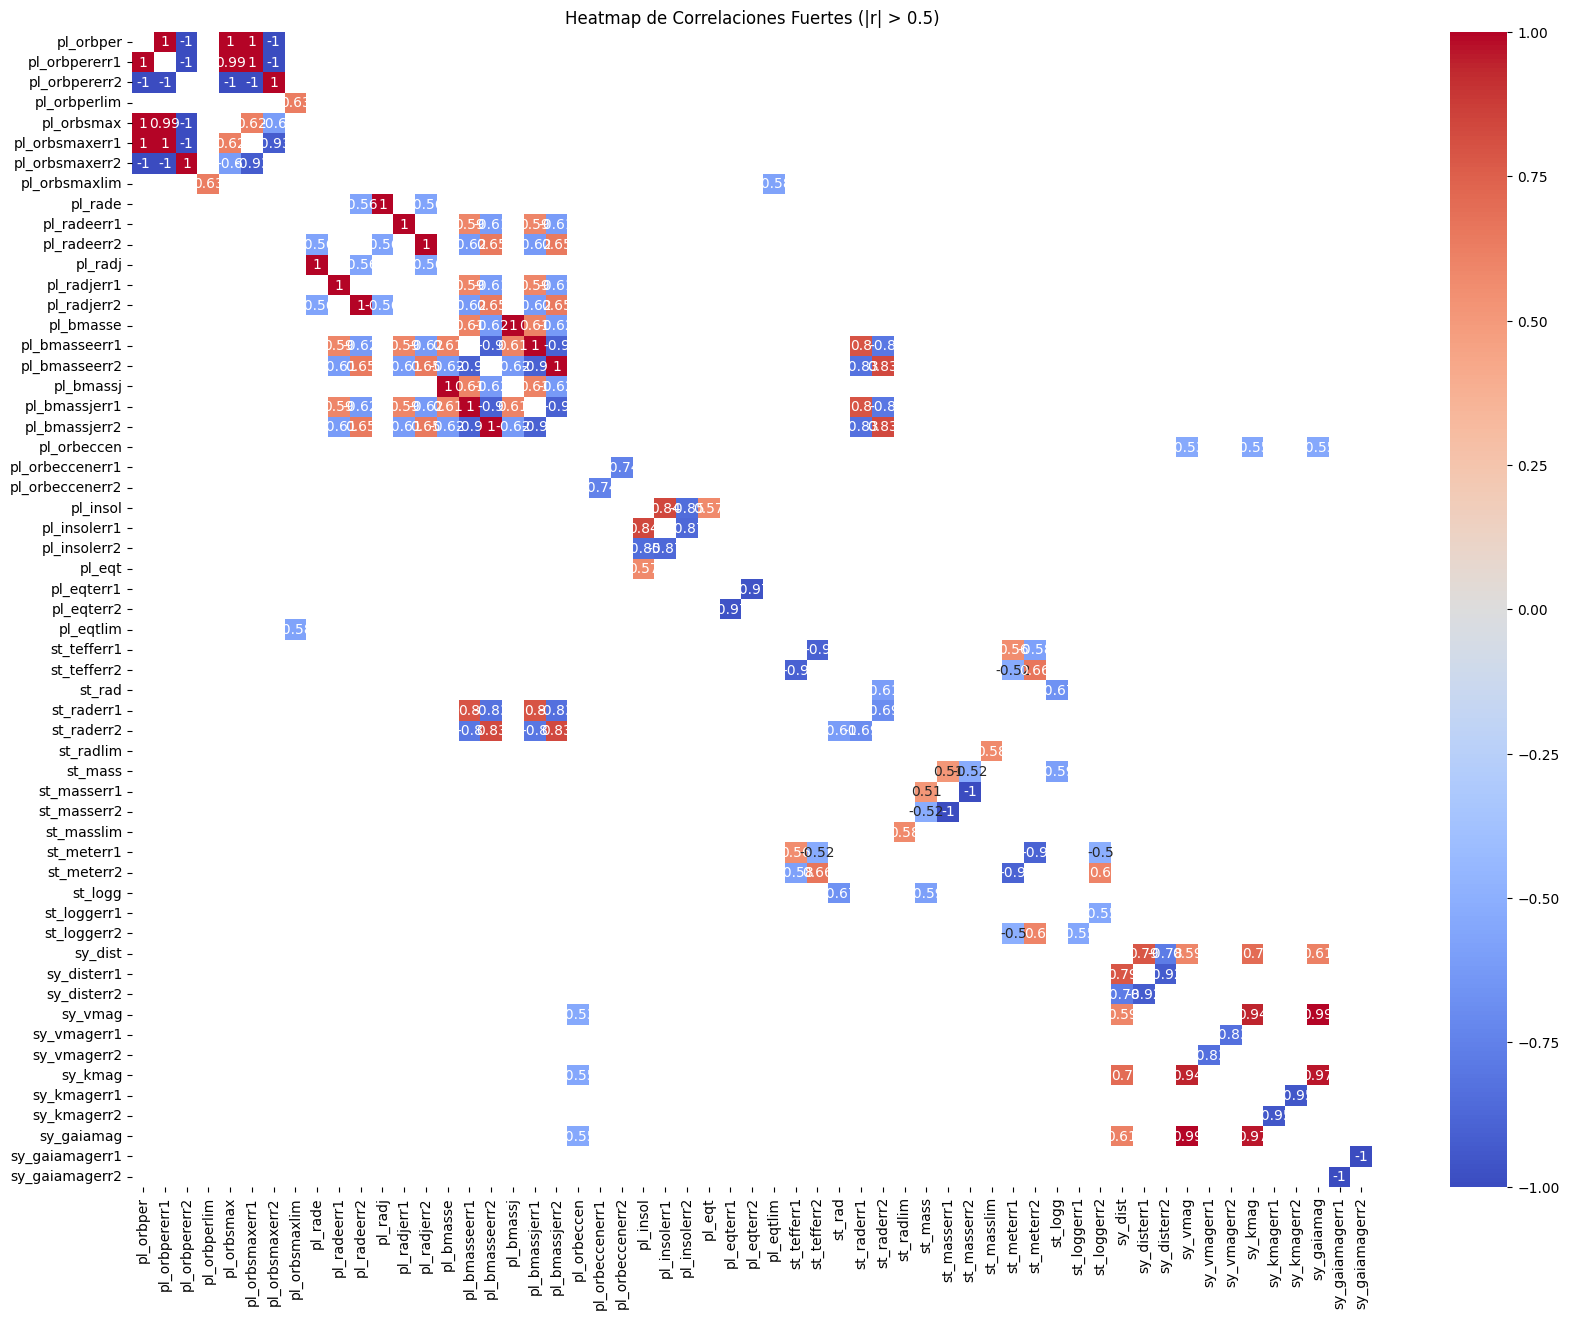

In [31]:
# Seleccionar solo columnas numéricas
numeric_df = data.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar solo correlaciones con valor absoluto > 0.5
filtered_corr = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)]

# Eliminar filas/columnas completamente nulas
filtered_corr = filtered_corr.dropna(how='all').dropna(how='all', axis=1)

plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.title("Heatmap de Correlaciones Fuertes (|r| > 0.5)");

In [13]:
# NOS QUEDAMOS CON LAS COLUMNAS QUE NOS INTERESAN
columnas_a_conservar = [
    'pl_name',        # nombre del planeta
    'pl_bmasse',      # masa terrestre
    'pl_rade',        # radio del planeta
    'pl_insol',       # irradiancia
    'pl_eqt',         # temperatura de equilibrio
    'pl_orbeccen',    # excentricidad orbital
    'pl_orbsmax',
    'sy_pnum',        # número de planetas en el sistema
    'sy_snum',
    'st_spectype',    # tipo espectral de la estrella
    'st_teff',        # temperatura de la estrella
    'discoverymethod'
]                       
df_hipotesis = data[columnas_a_conservar]

In [9]:
# Guardar DF en un nuevo CSV 
df_hipotesis.to_csv('../Datasets/hipotesis_2.csv')

In [10]:
df_hipotesis.head()

,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff,discoverymethod
0,11 Com b,6165.600000,NaN,NaN,NaN,0.231,1.290,1,2,G8 III,4742.0,Radial Velocity
1,11 Com b,5434.700000,NaN,NaN,NaN,NaN,1.210,1,2,NaN,NaN,Radial Velocity
2,11 Com b,4914.898486,NaN,NaN,NaN,0.238,1.178,1,2,G8 III,4874.0,Radial Velocity
3,11 UMi b,4684.814200,NaN,NaN,NaN,0.080,1.530,1,1,NaN,4213.0,Radial Velocity
4,11 UMi b,3337.070000,NaN,NaN,NaN,0.080,1.540,1,1,K4 III,4340.0,Radial Velocity


In [11]:
df_hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38449 entries, 0 to 38448
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38449 non-null  object 
 1   pl_bmasse        6638 non-null   float64
 2   pl_rade          26520 non-null  float64
 3   pl_insol         16808 non-null  float64
 4   pl_eqt           16788 non-null  float64
 5   pl_orbeccen      18463 non-null  float64
 6   pl_orbsmax       21646 non-null  float64
 7   sy_pnum          38449 non-null  int64  
 8   sy_snum          38449 non-null  int64  
 9   st_spectype      2716 non-null   object 
 10  st_teff          35240 non-null  float64
 11  discoverymethod  38449 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 3.5+ MB


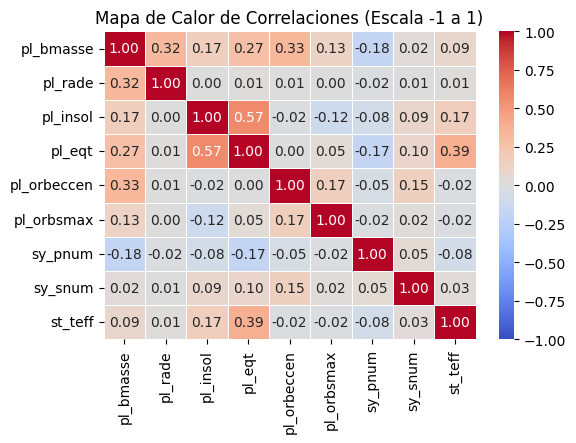

In [29]:
# QUE GRAFICAS PUEDO HACER CON ESTE CSV
# HEATMAP
# Seleccionar solo columnas numéricas
numeric_df = df_hipotesis.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Generar el heatmap con escala entre -1 y 1
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    vmin=-1, 
    vmax=1
)
plt.title("Mapa de Calor de Correlaciones (Escala -1 a 1)")
plt.savefig('../Imagenes/Mapa_Calor_Inicial')
plt.show();

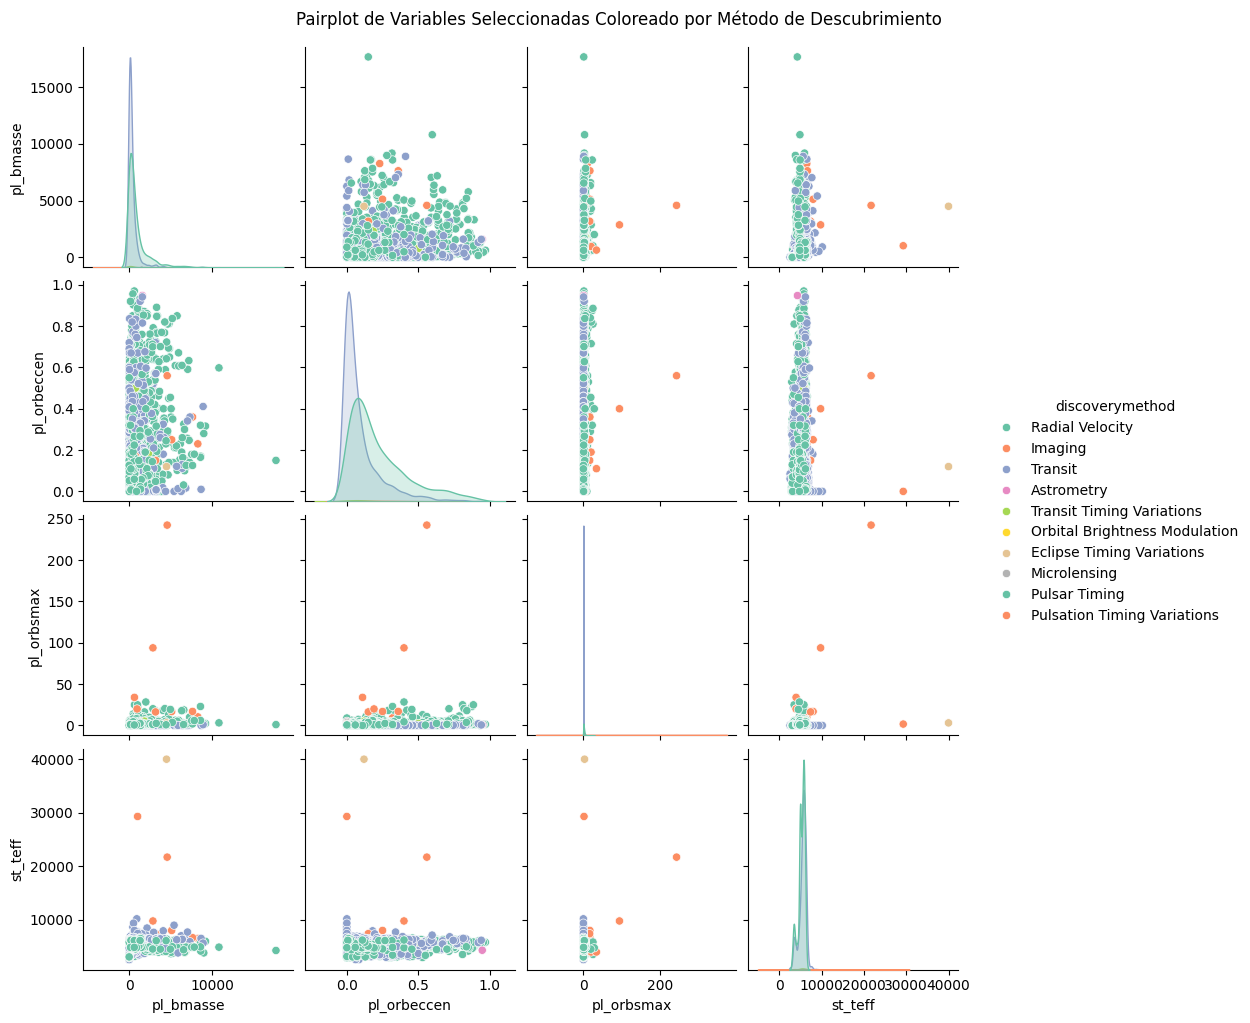

In [13]:
# QUE GRAFICAS PUEDO HACER CON ESTE CSV
# PAIRPLOT
# Seleccionar solo columnas numéricas
numeric_columns = ['pl_bmasse', 'pl_orbeccen', 'pl_orbsmax', 'st_teff']
df_filtered = df_hipotesis[numeric_columns + ['discoverymethod']].dropna()

# Crear el gráfico pairplot con hue por método de descubrimiento
sns.pairplot(df_filtered[numeric_columns + ['discoverymethod']], 
             hue='discoverymethod', 
             palette='Set2')
plt.suptitle("Pairplot de Variables Seleccionadas Coloreado por Método de Descubrimiento", y=1.02);

C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\3127364089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hipotesis['spectral_class'] = df_hipotesis['st_spectype'].str.extract(r'([KGM])')


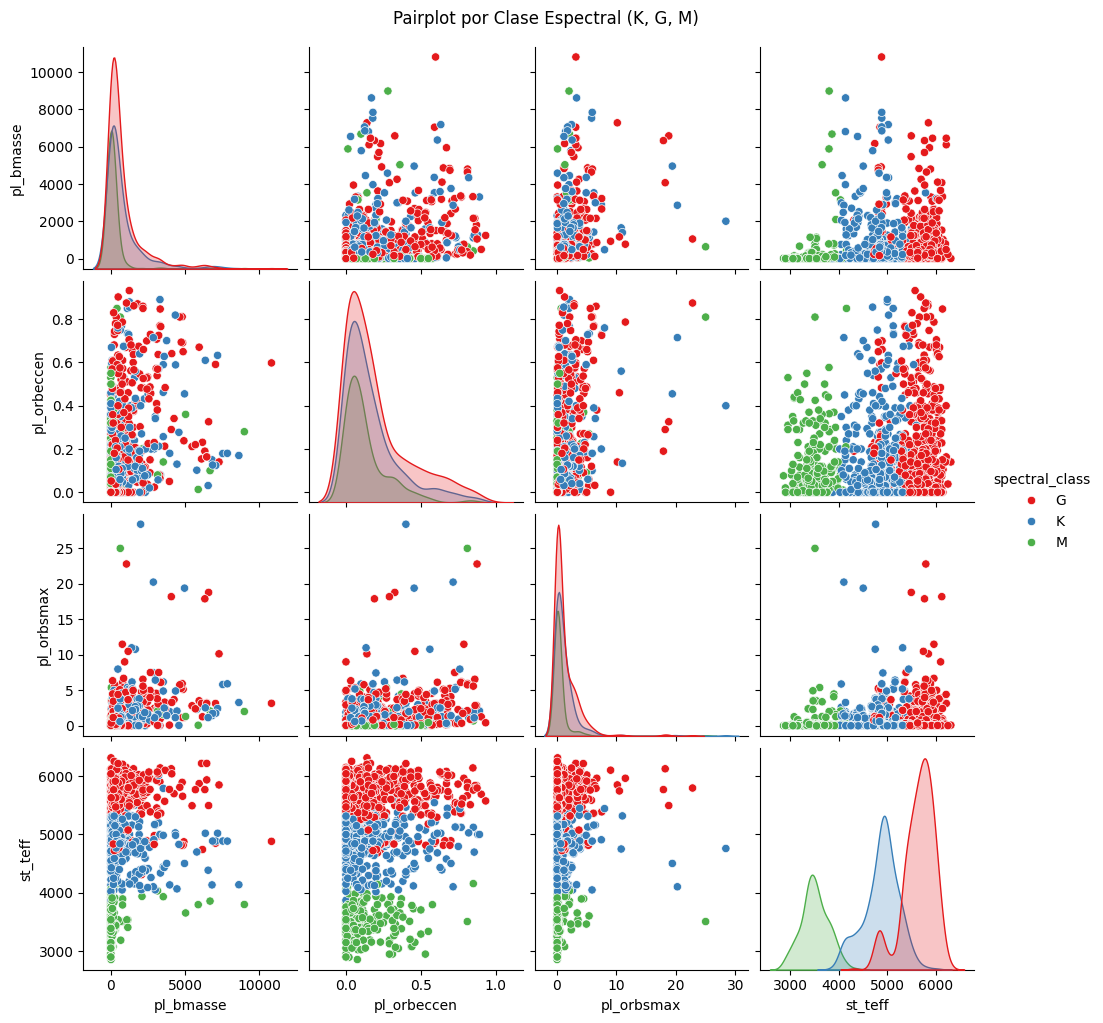

In [14]:
# QUE GRAFICAS PUEDO HACER CON ESTE CSV
# PAIRPLOT
# Crear el gráfico pairplot con hue por tipo de estrella K y G y M
# Extraer la letra del tipo espectral (K, G, M) de 'st_spectype'
numeric_columns = ['pl_bmasse', 'pl_orbeccen', 'pl_orbsmax', 'st_teff']
df_hipotesis['spectral_class'] = df_hipotesis['st_spectype'].str.extract(r'([KGM])')

# Filtrar solo filas con clase espectral K, G o M
df_filtered = df_hipotesis[df_hipotesis['spectral_class'].isin(['K', 'G', 'M'])]

# Seleccionar columnas necesarias y eliminar filas con NaN
columns = ['pl_bmasse', 'pl_orbeccen', 'pl_orbsmax', 'st_teff', 'spectral_class']
df_plot = df_filtered[columns].dropna()

# Crear el pairplot con color por clase espectral
sns.pairplot(df_plot, hue='spectral_class', palette='Set1')
plt.suptitle("Pairplot por Clase Espectral (K, G, M)", y=1.02); 

# Columnas relevantes 1 Hipotesis: # 

# pl_insol #
: Insolación (flujo de radiación recibido por el planeta en unidades de flujo terrestre).

Valores cercanos a 1 (similar a la Tierra) pueden indicar zona habitable. (0.35 ≤ pl_insol ≤ 1.5) bibliografia

# pl_eqt #
: Temperatura de equilibrio del planeta (en Kelvin).

Rangos similares a la Tierra (~250-350 K) pueden ser indicativos.

# st_teff #
: Temperatura efectiva de la estrella (en Kelvin).

Ayuda a determinar la zona habitable de la estrella.

# pl_orbsmax #
: Semieje mayor de la órbita (en AU).

Combinado con st_teff, permite calcular la zona habitable.

In [15]:
# Filtrar filas sin valores nulos en las columnas clave
cols_necesarias = ["pl_insol", "pl_bmasse", "pl_eqt",'st_spectype', 'discoverymethod']
df = df_hipotesis.dropna(subset=cols_necesarias)

print (df[cols_necesarias].dtypes)

pl_insol           float64
pl_bmasse          float64
pl_eqt             float64
st_spectype         object
discoverymethod     object
dtype: object


In [30]:
# Definir la zona habitable como insolación entre 0.25 y 2 veces la de la Tierra
zona_habitable = df[(df["pl_insol"] >= 0.35) & (df["pl_insol"] <= 2)]
zona_habitable

# Planetas fuera de la zona habitable
fuera_zona_habitable = df[(df["pl_insol"] < 0.35) | (df["pl_insol"] > 2)]

# Estadísticas comparativas
comparacion = {
    "Dentro Zona Habitable": zona_habitable[["pl_bmasse", "pl_eqt"]].describe(),
    "Fuera Zona Habitable": fuera_zona_habitable[["pl_bmasse", "pl_eqt"]].describe()
}

# Filtro de candidatos con condiciones similares a la Tierra
candidatos_vida = zona_habitable[
    (zona_habitable["pl_bmasse"] >= 0.8) & 
    (zona_habitable["pl_bmasse"] <= 10) &
    (zona_habitable["pl_eqt"] >= 200) &
    (zona_habitable["pl_eqt"] <= 320)
]

# Seleccionar columnas relevantes y ordenar
candidatos_vida_seleccion = candidatos_vida[["pl_name", "pl_bmasse", "pl_eqt", "pl_insol"]].sort_values(by="pl_eqt")

# Mostrar los 10 primeros candidatos
candidatos_vida_seleccion

,pl_name,pl_bmasse,pl_eqt,pl_insol
660,GJ 357 d,6.10,219.6,0.380
34676,LHS 1140 b,5.60,226.0,0.430
34679,LHS 1140 b,6.65,230.0,0.460
526,GJ 1002 b,1.08,230.9,0.670
35368,Proxima Cen b,1.27,234.0,0.650
3989,HN Lib b,5.46,234.4,0.503
38224,Wolf 1069 b,1.26,250.1,0.652
36016,TOI-2095 c,7.40,297.0,1.840
35621,TOI-1266 d,4.59,297.0,1.300
35442,Ross 128 b,1.40,301.0,1.380


c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

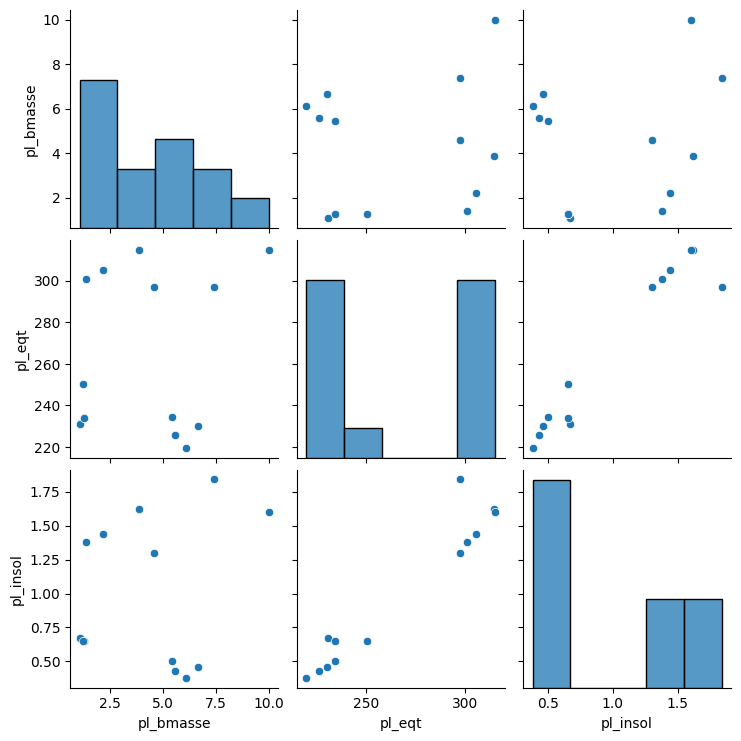

In [17]:
# Crear el pairplot con color por clase espectral
sns.pairplot(candidatos_vida_seleccion, palette='Set1'); 

C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\2608340392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en_habitable'] = df['pl_insol'].between(0.35, 2)


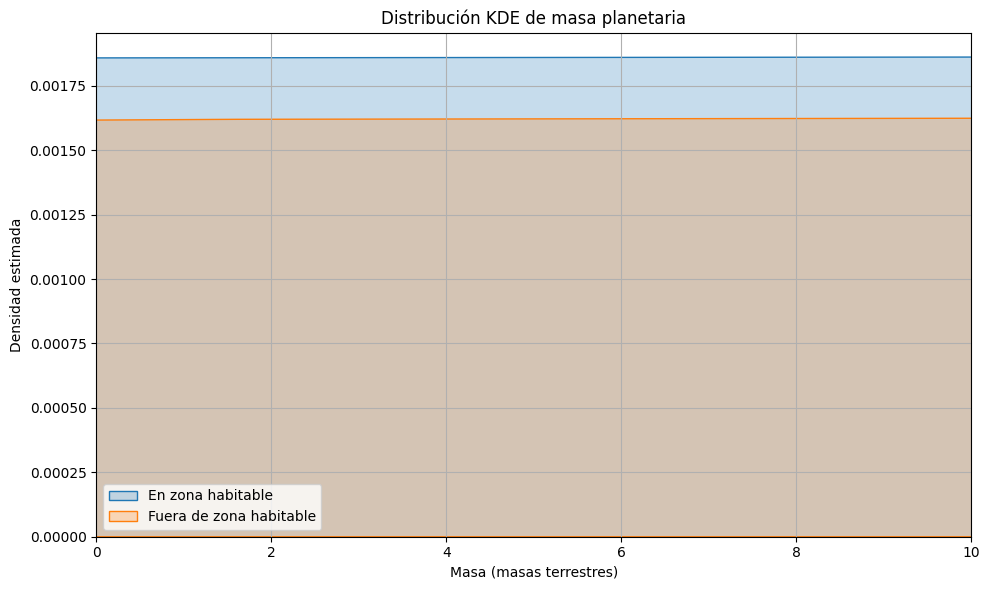

In [18]:

# Asegúrate de tener cargado el DataFrame
df['en_habitable'] = df['pl_insol'].between(0.35, 2)

# Filtrar filas con masa disponible
df_masa = df[df['pl_bmasse'].notna()]

# Crear el KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_masa[df_masa['en_habitable'] == True], x='pl_bmasse', label='En zona habitable', fill=True)
sns.kdeplot(data=df_masa[df_masa['en_habitable'] == False], x='pl_bmasse', label='Fuera de zona habitable', fill=True)

plt.title('Distribución KDE de masa planetaria')
plt.xlabel('Masa (masas terrestres)')
plt.ylabel('Densidad estimada')
plt.xlim(0, 10)  # Ajusta si hay valores extremos
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\1347861662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en_habitable'] = df['pl_insol'].between(0.35, 2)
C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\1347861662.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_rango.groupby(['masa_rango', 'en_habitable']).size().unstack(fill_value=0)


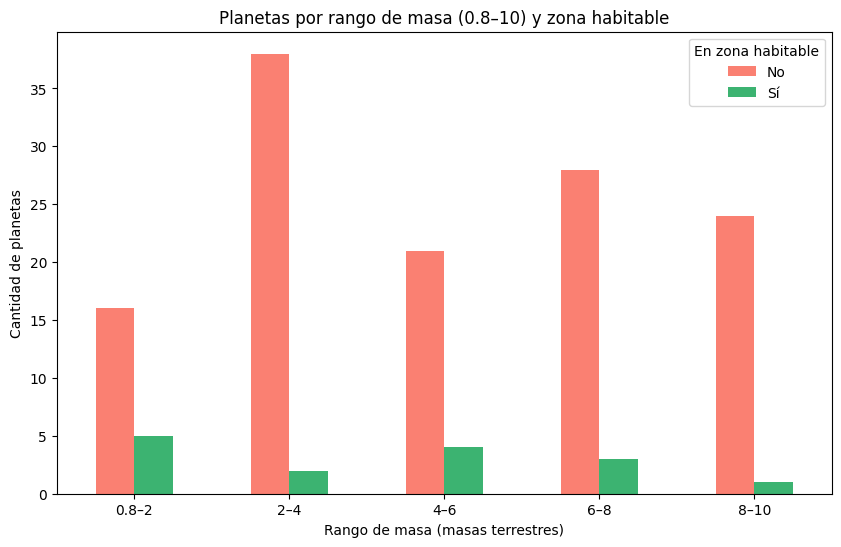

In [19]:
# Crear columna si está en zona habitable
df['en_habitable'] = df['pl_insol'].between(0.35, 2)

# Filtrar masas entre 0.8 y 10
df_rango = df[(df['pl_bmasse'].notna()) & (df['pl_bmasse'] >= 0.8) & (df['pl_bmasse'] <= 10)].copy()

# Definir rangos de masa dentro de ese intervalo
bins = [0.8, 2, 4, 6, 8, 10]
labels = ['0.8–2', '2–4', '4–6', '6–8', '8–10']
df_rango['masa_rango'] = pd.cut(df_rango['pl_bmasse'], bins=bins, labels=labels, include_lowest=True)

# Agrupar y contar
conteo = df_rango.groupby(['masa_rango', 'en_habitable']).size().unstack(fill_value=0)

# Graficar
conteo.plot(kind='bar', figsize=(10, 6), color=['salmon', 'mediumseagreen'])
plt.title('Planetas por rango de masa (0.8–10) y zona habitable')
plt.xlabel('Rango de masa (masas terrestres)')
plt.ylabel('Cantidad de planetas')
plt.legend(title='En zona habitable', labels=['No', 'Sí'])
plt.xticks(rotation=0);

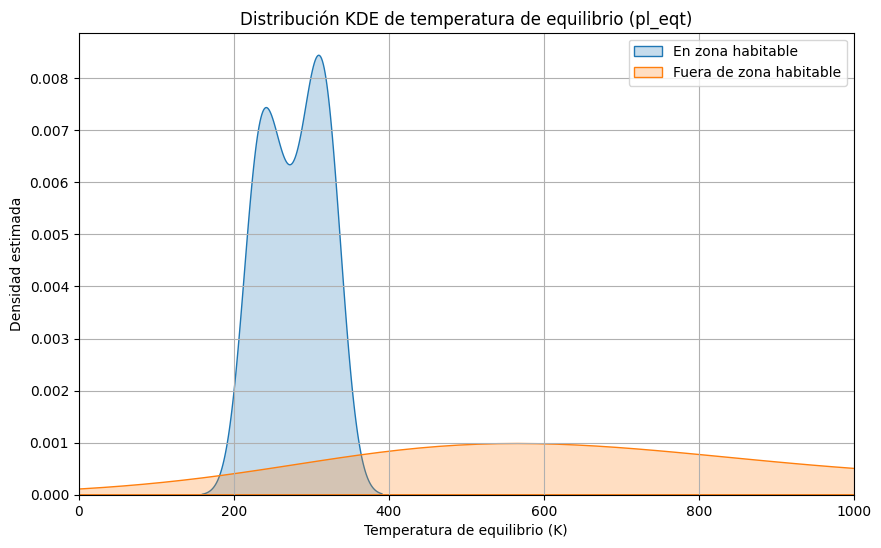

In [20]:
# Filtrar planetas con temperatura de equilibrio conocida
df_temp = df[df['pl_eqt'].notna()]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_temp[df_temp['en_habitable'] == True], x='pl_eqt', label='En zona habitable', fill=True)
sns.kdeplot(data=df_temp[df_temp['en_habitable'] == False], x='pl_eqt', label='Fuera de zona habitable', fill=True)

plt.title('Distribución KDE de temperatura de equilibrio (pl_eqt)')
plt.xlabel('Temperatura de equilibrio (K)')
plt.ylabel('Densidad estimada')
plt.xlim(0, 1000)  # Ajusta si hay valores extremos
plt.legend()
plt.grid(True)

# Columnas relevantes 2 Hipótesis:

# pl_bmasse
: Masa del planeta en masas terrestres (pl_bmasse).

Filtra planetas con masas entre ~0.8 y 10 masas terrestres (candidatos rocosos).

# pl_rade 
: Radio del planeta en radios terrestres (pl_rade).

Planetas con radios < 1.5 radios terrestres son más probables de ser rocosos.

In [21]:
# Filtrar masa similar a la Tierra (entre 0.8 y 10 masas terrestres)
masa_tierra = df[(df["pl_bmasse"] >= 0.8) & (df["pl_bmasse"] <= 10)]

# Adicionalmente, filtrar zona habitable y temperatura adecuada
candidatos_vida = masa_tierra[
    (masa_tierra["pl_insol"] >= 0.35) & (masa_tierra["pl_insol"] <= 2) &
    (masa_tierra["pl_eqt"] >= 200) & (masa_tierra["pl_eqt"] <= 320)
]
candidatos_vida

,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff,discoverymethod,spectral_class,en_habitable
526,GJ 1002 b,1.08,NaN,0.670,230.9,NaN,0.0457,2,1,M5.5 V,3024.0,Radial Velocity,M,True
660,GJ 357 d,6.10,NaN,0.380,219.6,NaN,0.2040,3,1,M2.5 V,3505.0,Radial Velocity,M,True
905,Gliese 12 b,10.00,0.900,1.600,315.0,NaN,0.0670,1,1,M4 V,3253.0,Transit,M,True
906,Gliese 12 b,3.87,0.958,1.620,314.6,0.500,0.0668,1,1,M3.0 V,3296.0,Transit,M,True
3989,HN Lib b,5.46,NaN,0.503,234.4,0.079,0.1417,1,1,M4.0 V,3347.0,Radial Velocity,M,True
5076,K2-3 d,2.20,1.458,1.440,305.2,0.091,0.2014,3,1,M V,3844.0,Transit,M,True
34676,LHS 1140 b,5.60,1.730,0.430,226.0,0.043,0.0946,2,1,M4.5 V,3096.0,Transit,M,True
34679,LHS 1140 b,6.65,1.430,0.460,230.0,0.290,0.0875,2,1,M4.5 V,3131.0,Transit,M,True
35368,Proxima Cen b,1.27,NaN,0.650,234.0,0.350,0.0485,1,3,M5.5 V,3050.0,Radial Velocity,M,True
35442,Ross 128 b,1.40,NaN,1.380,301.0,0.116,0.0496,1,1,M4,3192.0,Radial Velocity,M,True


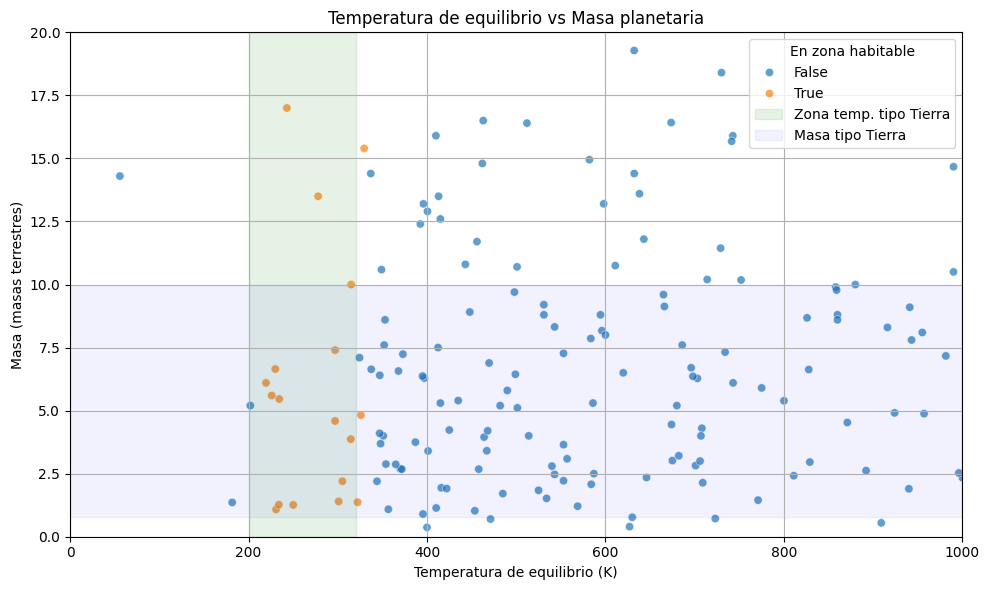

In [22]:
# Filtrar planetas con temperatura y masa disponibles
df_scatter = df[df['pl_eqt'].notna() & df['pl_bmasse'].notna()]

# Crear scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='pl_eqt', y='pl_bmasse', hue='en_habitable', alpha=0.7)

# Marcar zona tipo Tierra (opcional)
plt.axvspan(200, 320, color='green', alpha=0.1, label='Zona temp. tipo Tierra')
plt.axhspan(0.8, 10, color='blue', alpha=0.05, label='Masa tipo Tierra')

plt.title('Temperatura de equilibrio vs Masa planetaria')
plt.xlabel('Temperatura de equilibrio (K)')
plt.ylabel('Masa (masas terrestres)')
plt.xlim(0, 1000)
plt.ylim(0, 20)
plt.legend(title='En zona habitable')
plt.grid(True)
plt.tight_layout()
plt.show()


# Columnas relevantes 3 Hipótesis:

# st_spectype
: Tipo espectral de la estrella.

Filtra por tipos G (como el Sol) y K (enanas naranjas).

# st_teff
: Temperatura efectiva de la estrella.

Estrellas G: ~5,300–6,000 K; estrellas K: ~3,900–5,300 K.

In [23]:
df = df.dropna(subset=["pl_bmasse", "pl_eqt", "pl_insol", "st_spectype","discoverymethod"]).copy()
df["st_spectype"] = df["st_spectype"].astype(str).str.upper().str.strip()

# Filtrar planetas habitables
habitables = df[
    (df["pl_bmasse"] >= 0.5) & (df["pl_bmasse"] <= 20) & # Cambio de masa del planeta
    (df["pl_eqt"] >= 200) & (df["pl_eqt"] <= 320) & 
    (df["pl_insol"] >= 0.35) & (df["pl_insol"] <= 2)
]

# Dividir por tipo espectral
habitables_GK = habitables[habitables["st_spectype"].str.startswith(("G", "K", "M"))]
habitables_otras = habitables[~habitables["st_spectype"].str.startswith(("G", "K", "M"))]

habitables_GK

,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff,discoverymethod,spectral_class,en_habitable
526,GJ 1002 b,1.08,NaN,0.670,230.9,NaN,0.0457,2,1,M5.5 V,3024.0,Radial Velocity,M,True
660,GJ 357 d,6.10,NaN,0.380,219.6,NaN,0.2040,3,1,M2.5 V,3505.0,Radial Velocity,M,True
905,Gliese 12 b,10.00,0.900,1.600,315.0,NaN,0.0670,1,1,M4 V,3253.0,Transit,M,True
906,Gliese 12 b,3.87,0.958,1.620,314.6,0.500,0.0668,1,1,M3.0 V,3296.0,Transit,M,True
2714,HD 191939 g,13.50,NaN,0.990,278.0,0.030,0.8120,6,1,G9 V,5348.0,Radial Velocity,G,True
3989,HN Lib b,5.46,NaN,0.503,234.4,0.079,0.1417,1,1,M4.0 V,3347.0,Radial Velocity,M,True
5076,K2-3 d,2.20,1.458,1.440,305.2,0.091,0.2014,3,1,M V,3844.0,Transit,M,True
15470,Kepler-1661 b,17.00,3.870,0.880,243.0,0.057,0.6330,1,2,K,5100.0,Transit,K,True
34676,LHS 1140 b,5.60,1.730,0.430,226.0,0.043,0.0946,2,1,M4.5 V,3096.0,Transit,M,True
34679,LHS 1140 b,6.65,1.430,0.460,230.0,0.290,0.0875,2,1,M4.5 V,3131.0,Transit,M,True


C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\3678090083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  habitables["tipo_spectral"] = habitables["st_spectype"].str[0]
C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\3678090083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")


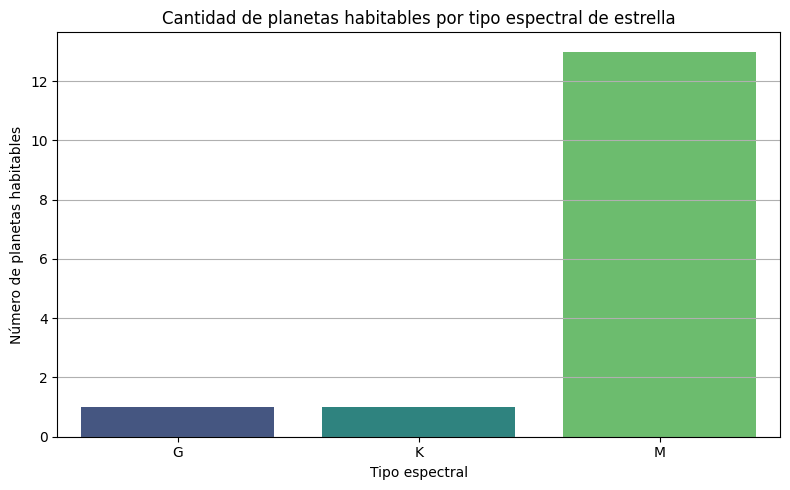

In [24]:
# Agrupar y contar los tipos espectrales (primer carácter)
habitables["tipo_spectral"] = habitables["st_spectype"].str[0]
conteo = habitables["tipo_spectral"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")
plt.title("Cantidad de planetas habitables por tipo espectral de estrella")
plt.xlabel("Tipo espectral")
plt.ylabel("Número de planetas habitables")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\527928837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=habitables, y='discoverymethod', order=habitables['discoverymethod'].value_counts().index, palette="magma")


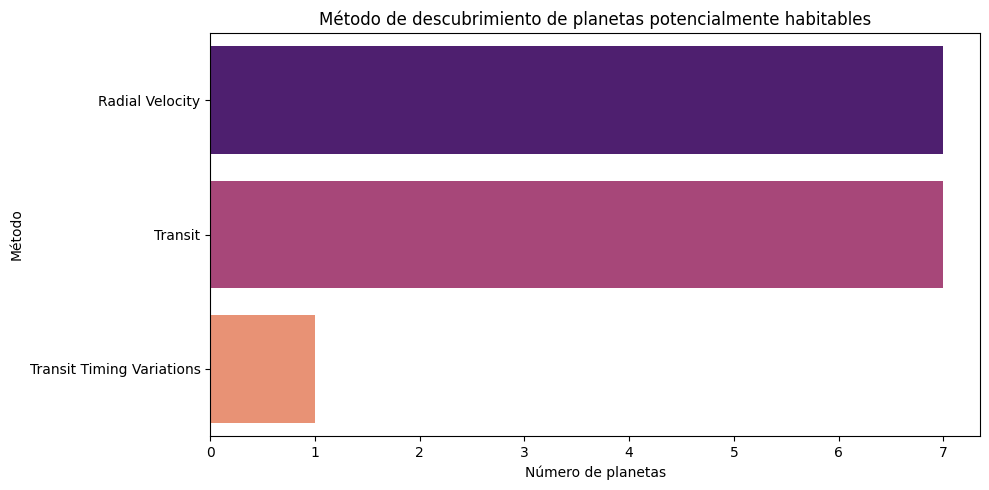

In [25]:
#🌞 3. Método de descubrimiento de planetas habitables
# ¿Los planetas habitables se descubren más por tránsito o velocidad radial?

plt.figure(figsize=(10, 5))
sns.countplot(data=habitables, y='discoverymethod', order=habitables['discoverymethod'].value_counts().index, palette="magma")
plt.title("Método de descubrimiento de planetas potencialmente habitables")
plt.xlabel("Número de planetas")
plt.ylabel("Método")
plt.tight_layout()
plt.show()


C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\3835765818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  habitables["Grupo"] = habitables["st_spectype"].str.startswith(("G", "K", "M")).map({True: "G-K-M", False: "Otros"})
C:\Users\amaci\AppData\Local\Temp\ipykernel_16320\3835765818.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=habitables, x='Grupo', y='pl_bmasse', palette="Set2")


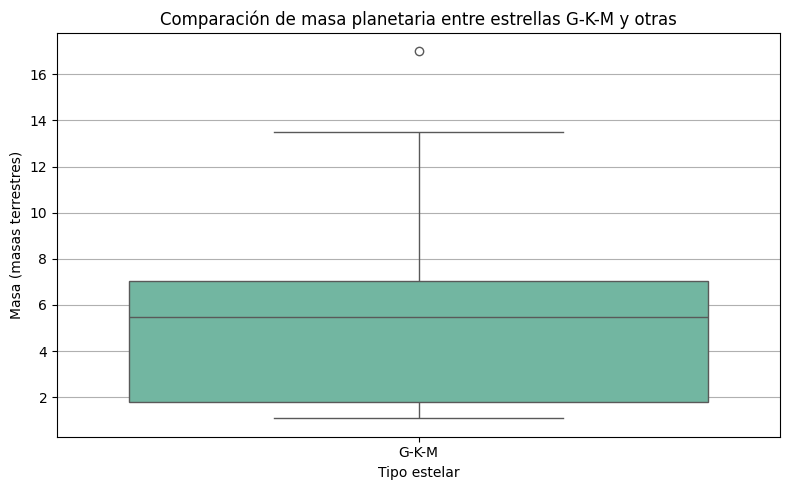

In [26]:
# 📊 4. Comparar G/K vs otras estrellas en masa o temperatura
# Ejemplo: boxplot de masa para ver si los planetas de G/K son distintos en masa.

habitables["Grupo"] = habitables["st_spectype"].str.startswith(("G", "K", "M")).map({True: "G-K-M", False: "Otros"})

plt.figure(figsize=(8, 5))
sns.boxplot(data=habitables, x='Grupo', y='pl_bmasse', palette="Set2")
plt.title("Comparación de masa planetaria entre estrellas G-K-M y otras")
plt.xlabel("Tipo estelar")
plt.ylabel("Masa (masas terrestres)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Columnas relevantes 4 Hipótesis:

# pl_orbeccen
: Excentricidad orbital del planeta.

Valores cercanos a 0 (ej. < 0.1) indican órbitas casi circulares.



In [27]:

# Clasificar órbitas
df_clean = df.copy()
df_clean = df_clean[df_clean['pl_orbeccen'].notnull()]
df_clean['orbital_type'] = np.where(df_clean['pl_orbeccen'] < 0.2, 'Casi circular', 'Excéntrica')

# Filtrar exoplanetas con datos suficientes para análisis de habitabilidad
df_filtered = df_clean[
    df_clean[['pl_bmasse', 'pl_insol', 'pl_eqt', 'st_teff']].notnull().any(axis=1)
]

# Definir criterio de habitabilidad:
# - pl_insol entre 0.35 y 2 (zona habitable aproximada)
# - o temperatura de equilibrio entre 200K y 320K
# - y estrella con temperatura entre 5000K y 6000K (tipo solar)
df_filtered['en_zona_habitable'] = (
    ((df_filtered['pl_insol'].between(0.35, 2)) | 
     (df_filtered['pl_eqt'].between(200, 320))) &
    (df_filtered['st_teff'].between(5000, 6000))
)
df_filtered


,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff,discoverymethod,spectral_class,en_habitable,orbital_type,en_zona_habitable
228,Barnard b,0.37,NaN,6.76,400.0,0.1600,0.02294,4,1,M3.5-4 V,3195.0,Radial Velocity,M,False,Casi circular,False
509,EPIC 249893012 b,8.75,1.950,1037.00,1616.0,0.0600,0.04700,3,1,G8 IV/V,5430.0,Transit,G,False,Casi circular,False
510,EPIC 249893012 c,14.67,3.670,160.00,990.0,0.0700,0.13000,3,1,G8 IV/V,5430.0,Transit,G,False,Casi circular,False
511,EPIC 249893012 d,10.18,3.940,53.00,752.0,0.1500,0.22000,3,1,G8 IV/V,5430.0,Transit,G,False,Casi circular,False
514,G 192-15 b,1.03,NaN,7.06,453.6,0.0000,0.01723,2,1,M5.0 V,NaN,Radial Velocity,M,False,Casi circular,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38317,YZ Cet c,1.14,NaN,4.72,410.3,0.0000,0.02156,3,1,M4.5 V,3151.0,Radial Velocity,M,False,Casi circular,False
38319,YZ Cet d,1.09,NaN,2.70,356.7,0.0700,0.02851,3,1,M4.5 V,3151.0,Radial Velocity,M,False,Casi circular,False
38401,pi Men c,4.82,2.042,309.00,1169.8,0.0000,0.06839,3,1,G0 V,6037.0,Transit,G,False,Casi circular,False
38408,rho CrB b,332.10,NaN,34.70,614.0,0.0373,0.21960,4,1,G0 V,5627.0,Radial Velocity,G,False,Casi circular,False


In [28]:
# Estadísticas comparativas
hab_stats = df_filtered.groupby('orbital_type')['in_habitable_zone'].agg(['count', 'sum', 'mean'])
hab_stats.rename(columns={'count': 'Total', 'sum': 'Habitables', 'mean': 'Proporción'}, inplace=True)

KeyError: 'Column not found: in_habitable_zone'

Text(0, 0.5, 'Número de Exoplanetas')

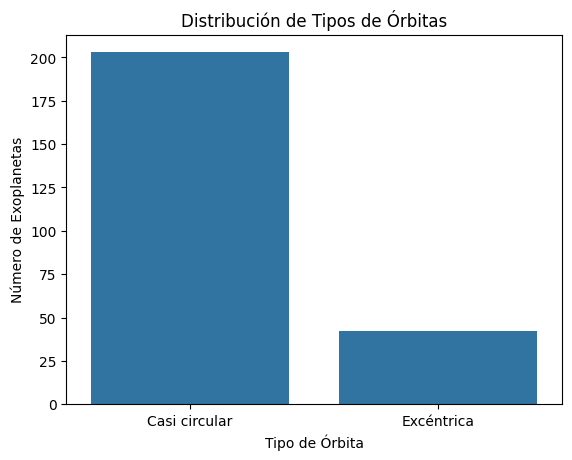

In [ ]:
# Comparar cuántos planetas tienen órbitas casi circulares vs. excéntricas.
sns.countplot(data=df_filtered, x='orbital_type')
plt.title("Distribución de Tipos de Órbitas")
plt.xlabel("Tipo de Órbita")
plt.ylabel("Número de Exoplanetas")

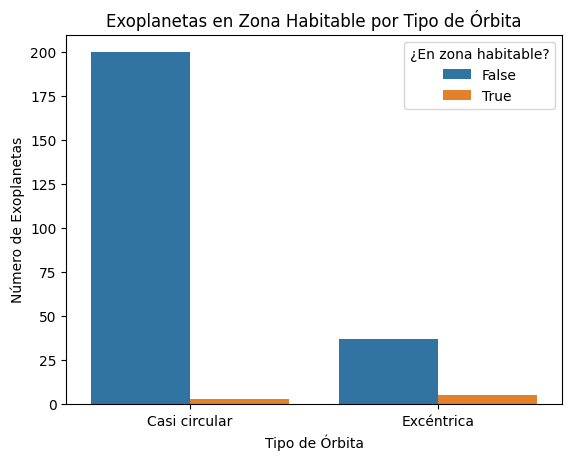

In [ ]:
# Comparar cuántos planetas potencialmente habitables tienen órbitas circulares o excéntricas.

sns.countplot(data=df_filtered, x='orbital_type', hue='en_zona_habitable')
plt.title("Exoplanetas en Zona Habitable por Tipo de Órbita")
plt.xlabel("Tipo de Órbita")
plt.ylabel("Número de Exoplanetas")
plt.legend(title="¿En zona habitable?");

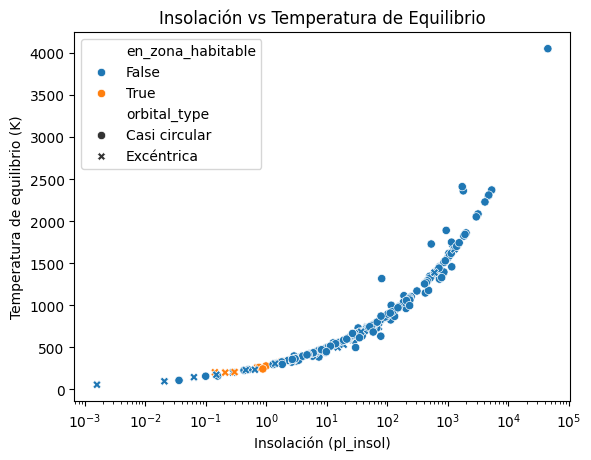

In [ ]:
# Coloreado por habitabilidad para ver su distribución.

sns.scatterplot(
    data=df_filtered, 
    x='pl_insol', 
    y='pl_eqt', 
    hue='en_zona_habitable', 
    style='orbital_type'
)
plt.title("Insolación vs Temperatura de Equilibrio")
plt.xlabel("Insolación (pl_insol)")
plt.ylabel("Temperatura de equilibrio (K)")
plt.xscale('log')  # escalar log si hay valores dispersos;

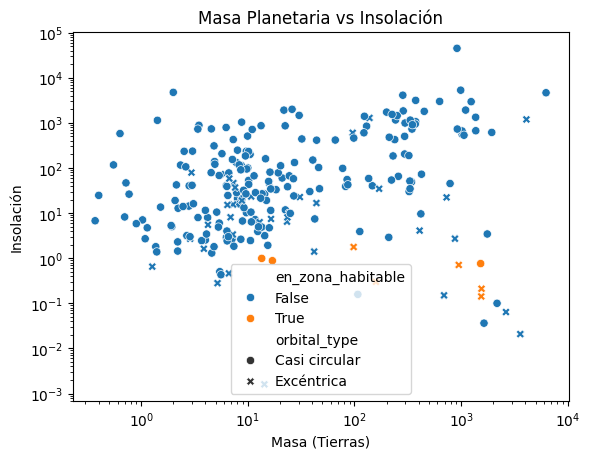

In [ ]:
# Útil para ver qué tipos de planetas están en la zona habitable.

sns.scatterplot(
    data=df_filtered, 
    x='pl_bmasse', 
    y='pl_insol', 
    hue='en_zona_habitable', 
    style='orbital_type'
)
plt.title("Masa Planetaria vs Insolación")
plt.xlabel("Masa (Tierras)")
plt.ylabel("Insolación")
plt.xscale('log')
plt.yscale('log')

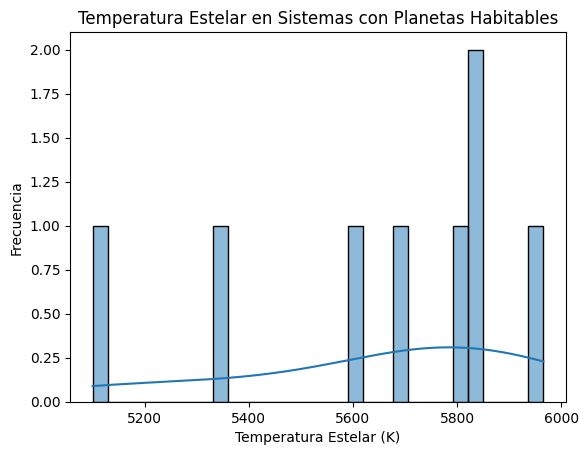

In [ ]:
# Esto te puede mostrar si ciertas estrellas favorecen la habitabilidad.

sns.histplot(
    data=df_filtered[df_filtered['en_zona_habitable']], 
    x='st_teff', 
    bins=30, 
    kde=True
)
plt.title("Temperatura Estelar en Sistemas con Planetas Habitables")
plt.xlabel("Temperatura Estelar (K)")
plt.ylabel("Frecuencia");

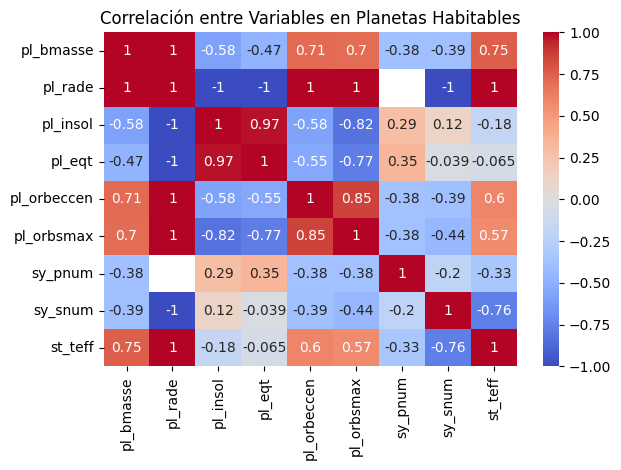

In [ ]:
# Heatmap de correlación solo para planetas en zona habitable
habitable_corr = df_filtered[df_filtered['en_zona_habitable']].select_dtypes('number').corr()

sns.heatmap(habitable_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre Variables en Planetas Habitables")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Columnas relevantes 5 Hipótesis:

# sy_pnum
: Número de planetas en el sistema.

# Sistemas con sy_pnum > 1 son multiplanetarios.

pl_insol o pl_eqt: Para verificar si alguno de los planetas está en la zona habitable.

In [ ]:
df = pd.read_csv("hipotesis_2.csv")
# Extraer nombre del sistema (todo antes del primer espacio en pl_name)
df['system_name'] = df['pl_name'].str.extract(r'^([^\s]+)')

# Definir si el planeta está en la zona habitable:
# - Irradiancia entre 0.35 y 2 o temperatura de equilibrio entre 180K y 310K
# - Estrella tipo solar (temperatura entre 5000K y 6000K)
df['en_zona_habitable'] = (
    ((df['pl_insol'].between(0.35, 2)) | (df['pl_eqt'].between(200, 320))) &
    (df['st_teff'].between(5000, 6000))
)

# Agrupar por sistema: tomar número de planetas y si hay alguno habitable
systems = df.groupby('system_name').agg({
    'sy_pnum': 'first',
    'en_zona_habitable': 'max'  # True si al menos uno es habitable
}).rename(columns={'en_zona_habitable': 'tiene_planetas_habitables'})

# Agrupar por cantidad de planetas y calcular estadísticas
result = systems.groupby('sy_pnum')['tiene_planetas_habitables'].agg(['count', 'sum', 'mean'])
result.rename(columns={'count': 'Total Sistemas', 'sum': 'Con Habitables', 'mean': 'Proporción'}, inplace=True)

result



,Total Sistemas,Con Habitables,Proporción
sy_pnum,,,
1,2820,43,0.015248
2,504,27,0.053571
3,172,6,0.034884
4,67,2,0.029851
5,21,1,0.047619
6,6,0,0.000000
7,1,0,0.000000
8,2,1,0.500000


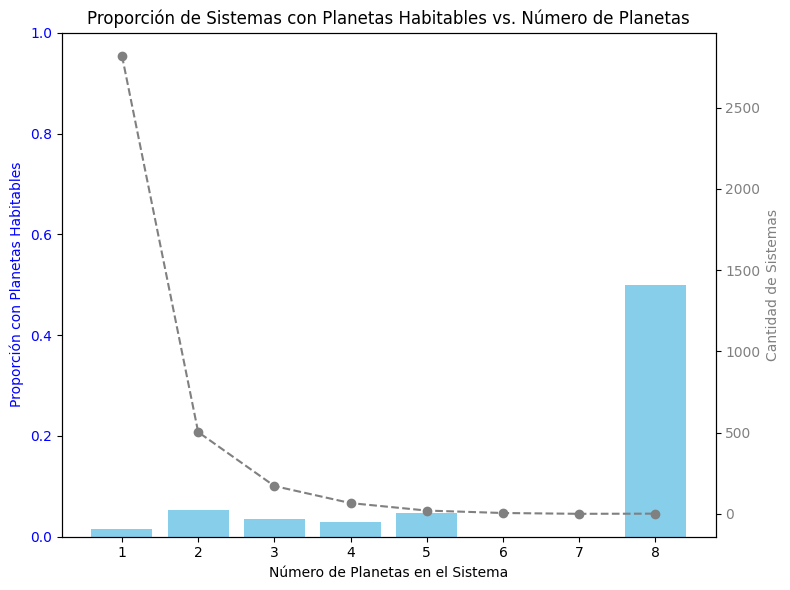

In [ ]:
# Resetear el índice para facilitar graficar
result_reset = result.reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barras: proporción de sistemas con habitables
ax1.bar(result_reset['sy_pnum'], result_reset['Proporción'], color='skyblue')
ax1.set_xlabel('Número de Planetas en el Sistema')
ax1.set_ylabel('Proporción con Planetas Habitables', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)
ax1.set_title('Proporción de Sistemas con Planetas Habitables vs. Número de Planetas')

# Línea secundaria: cantidad de sistemas totales
ax2 = ax1.twinx()
ax2.plot(result_reset['sy_pnum'], result_reset['Total Sistemas'], color='gray', marker='o', linestyle='--', label='Total Sistemas')
ax2.set_ylabel('Cantidad de Sistemas', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.tight_layout()
plt.show()